# W5 - Artificial Neuron

This notebook contains personal notes and Python, Numpy and Latex of exercises from the "AI by Hand ✍️ Workbook" by Prof. Tom Yeh.


Reference: [AI by Hand - W5: Artificial Neuron](https://www.byhand.ai/p/w5-artificial-neuron)

**Contents:**
- Artificial Neuron Notation
- ReLU
- 3-Level Quantization for Hand Calculation


## Artificial Neuron Notation

### Vector
E. g a user embedding, or numerical properties (heigth, weight, salary)

$ x = (x1, x2, ..., Xn)$

### One Neuron 
It essentially represents the features. It is a linear function

$w = (w1,w2, ..., wn)$ 

### Bias of a single neuron
Analogous to the intercept of linear functions.
$b$

### Neuron computation

$y = w*x + b$


### X is a matrix of feature vectors
E. g. Multiple user embeddings 

$$ \mathbf{X} = 

\begin{pmatrix} 
x_{1, 1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2, 1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{3, 1} & x_{3,2} & \cdots & x_{3,n} \\
\end{pmatrix} $$


### W is the weight matrix
A matrix of neurons

$$ \mathbf{W} = 

\begin{pmatrix} 
w_{1, 1} & w_{1,2} & \cdots & w_{1,n} \\
w_{2, 1} & w_{2,2} & \cdots & w_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{3, 1} & w_{3,2} & \cdots & w_{3,n} \\
\end{pmatrix} $$

### Bias vector
Analogous to the intercept of linear functions. One b per neuron

$b = (b1,b2, ..., bn) $

### Neural Layer Computation

A neural layer with $m$ neurons and $n$ input features:

- Weight matrix: $\mathbf{W}$ of shape $(m \times n)$
- Input vector: $\mathbf{x}$ of shape $(n \times 1)$
- Bias vector: $\mathbf{b}$ of shape $(m \times 1)$

The computation is:

$$
\mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b}
$$

### Activation
Transform the result of the matrix multiplication using a modulating function like ReLU, Sigmoid, etc.
The activation function is applied to make the neural network non linear and find obscure patterns. 

$$
\mathbf{y} = Activation(\mathbf{W} \mathbf{x} + \mathbf{b})
$$




In [15]:
import numpy as np

In [16]:
# Exercise 1
# X Vector
x = np.array([3,1])
print(x)

# Weights
w = np.array([1,1])
print(w)

# Bias
b = -5
print(b)

# Y Output (pre activation)
y = np.dot(w, x) + b
print(y)

[3 1]
[1 1]
-5
-1


In [17]:
# Exercise 15 - Pre activation

# X Vector
x = np.array([5,2,-3])

# Weights
w = np.array([[0,1,0], [1,0,-1], [1,-1,0]])

# Bias
b = np.array([-3,0,0])

# y pre-activation

y = np.dot(w, x) + b

print(y)

[-1  8  3]


## ReLU: Rectified Linear Unit

- Activation functions like ReLU allow for non-linearity. Without activation fuctions, neural networks would approximate to a linear regression function. This allows the network to learn complex functions. 

It is defined as:
$$f(x) = max(0,1)$$

Also:
$$f(x) = \begin{cases} 

x & \text{if } x >=0 \\
0 & \text{if } x< 0
\end{cases}
$$

In [18]:
def ReLU(x):
    if x > 0:
        return x
    else:
        return 0 
    
assert ReLU(-1) == 0
assert ReLU(2) == 2

In [19]:
x_array = np.linspace(-5,5,7)
y_array = [ReLU(x) for x in x_array]
print(y_array)

[0, 0, 0, 0, np.float64(1.666666666666667), np.float64(3.333333333333334), np.float64(5.0)]


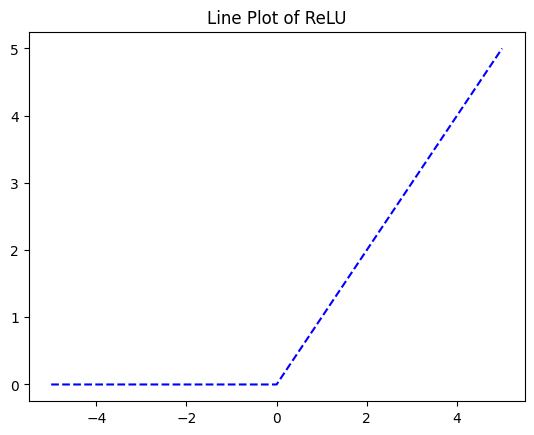

In [20]:
import matplotlib.pyplot as plt
plt.plot(x_array, y_array, label='ReLU', color='blue', linestyle='--')
plt.title('Line Plot of ReLU')
plt.show()

In [21]:
# Exercise 1 with ReLU
# X Vector
x = np.array([3,1])
print(x)

# Weights
w = np.array([1,1])
print(w)

# Bias
b = -5
print(b)

# Y Output (pre activation)
y = ReLU(np.dot(w, x) + b)
print(y)


[3 1]
[1 1]
-5
0


In [22]:
# Exercise 15 - with ReLU

# X Vector
x = np.array([5,2,-3])

# Weights
w = np.array([[0,1,0], [1,0,-1], [1,-1,0]])

# Bias
b = np.array([-3,0,0])

# y pre-activation

y = np.dot(w, x) + b

print(y)

# y post ReLU
y = [ReLU(i) for i in y]

print(y)

# [Q] is there a way apply ReLU to arrays in numpy? Yes, with np functions. 

[-1  8  3]
[0, np.int64(8), np.int64(3)]


#### Numpy ReLU

Elementwise compatible implementation

In [23]:
def ReLU(x):
    return np.maximum(0,x)

assert ReLU(-1) == 0
assert ReLU(1) == 1
assert np.array_equal(ReLU(np.array([-2,0,2])), np.array([0,0,2]))

In [24]:
# Exercise 15 - numpy ReLU

# X Vector
x = np.array([5,2,-3])

# Weights
w = np.array([[0,1,0], [1,0,-1], [1,-1,0]])

# Bias
b = np.array([-3,0,0])

# y 
y = ReLU(np.dot(w, x) + b)

print(y)

[0 8 3]


### 3 Level Quantization for Sigmoid function

This is a simplification of the sigmoid function for hand calculations


$$f(x) = \begin{cases} 

1 & \text{if } x >=2 \\
0.5 & \text{if } in (-1, 0, 1) \\
0 & \text{if } x <=-2 \\
\end{cases}
$$

In [25]:
def quantized_sigmoid(x):
    return np.where(x >=2, 1,
                    np.where(x >= -1, 0.5, 
                            0)
                    )

assert quantized_sigmoid(1) == 0.5
assert quantized_sigmoid(-1) == 0.5
assert np.array_equal(quantized_sigmoid(np.array([-3, -2, -1, 0, 1, 2, 3])), np.array([0, 0, 0.5, 0.5, 0.5, 1, 1]))

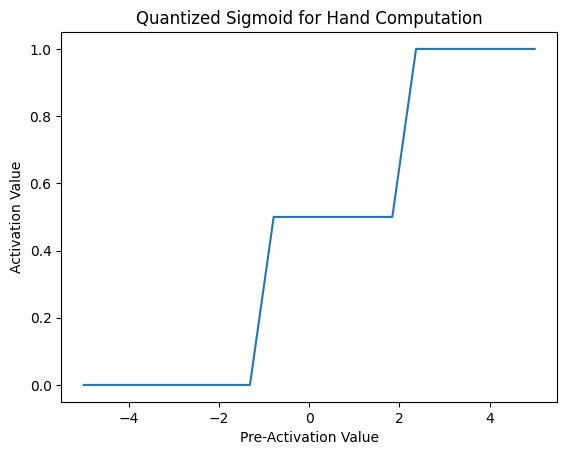

In [26]:
# Visualizing it
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,20)
y = quantized_sigmoid(x)

plt.plot(x, y)
plt.xlabel('Pre-Activation Value')
plt.ylabel('Activation Value')
plt.title('Quantized Sigmoid for Hand Computation')
plt.show()


In [27]:
# Exercise 15  variation with sigmoid

# X Vector
x = np.array([5,2,-3])

# Weights
w = np.array([[0,1,0], [1,0,-1], [1,-1,0]])

# Bias
b = np.array([-3,0,0])

# y 
y = quantized_sigmoid(np.dot(w, x) + b)

print(y)

[0.5 1.  1. ]


In [28]:
# Exercise 25  

# X Vector
x = np.array([2,4,3])

# Weights
w = np.array([[1,-1,0], [1,0,-1], [1,0,0]])

# Bias
b = np.array([0,0,0])

# y pre activation
y = np.dot(w, x) + b

print(y)

# y post-activation

y = quantized_sigmoid(np.dot(w, x) + b)

print(y)

[-2 -1  2]
[0.  0.5 1. ]
